In [52]:
import os
import re
import warnings
from copy import deepcopy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('Estilo/toutl.mplstyle')
from style import *


In [53]:
df = pd.read_csv('Datos/examen3.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   client_stayed             10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [54]:
display(df)

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,3,2,3,4003.0,1851,15476,117
10123,710638233,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,4,2,3,4277.0,2186,8764,69
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,5,3,4,5409.0,0,10291,60
10125,717406983,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,4,3,3,5281.0,0,8395,62


In [55]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values in {col}:")
        print(df[col].unique())
    else:
        continue
df['dependent_count'].unique()

Unique values in gender:
['M' 'F']
Unique values in education_level:
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Unique values in marital_status:
['Married' 'Single' 'Unknown' 'Divorced']
Unique values in income_category:
['5833.333333333333' '1666.6666666666667' '8333.333333333334'
 '4166.666666666667' '10000.0' 'Unknown']
Unique values in card_category:
['Blue' 'Gold' 'Silver' 'Platinum']


array([3, 5, 4, 2, 0, 1], dtype=int64)

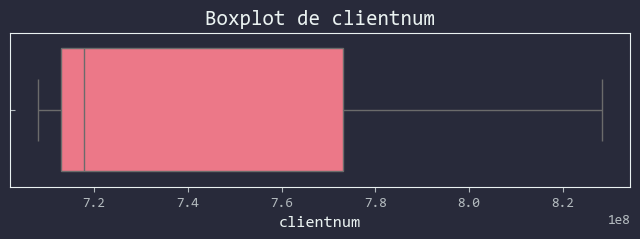

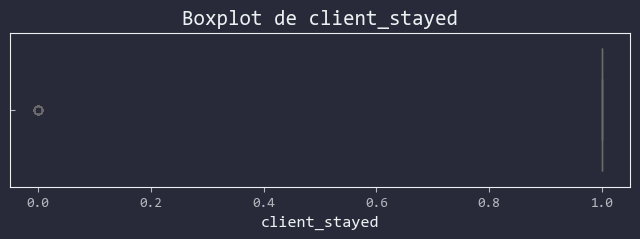

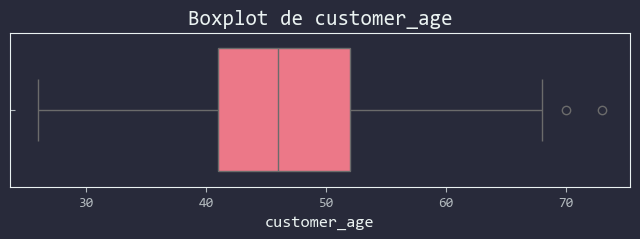

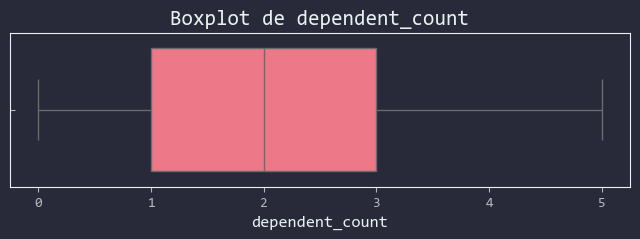

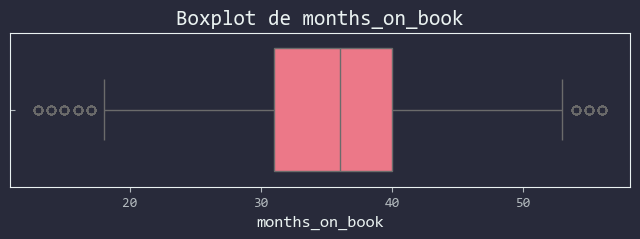

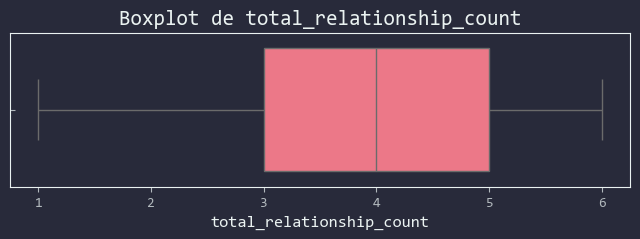

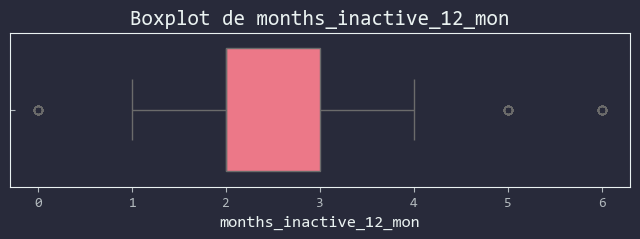

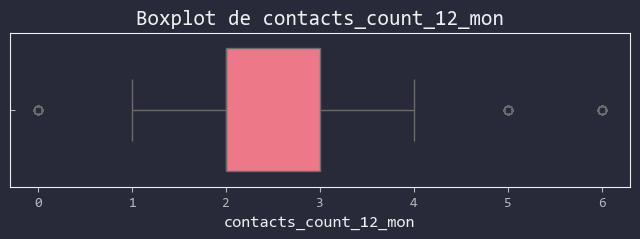

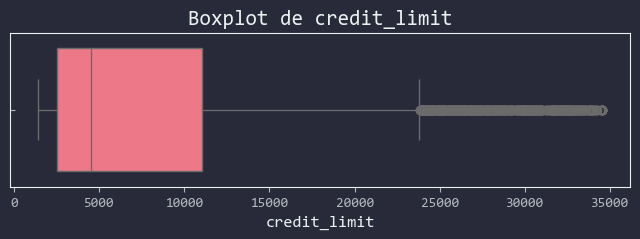

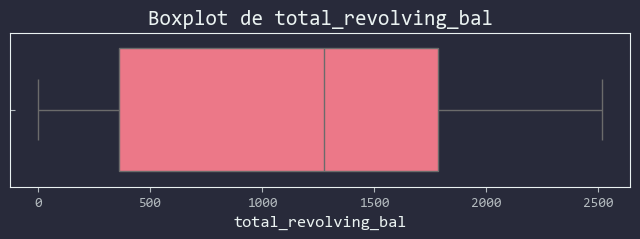

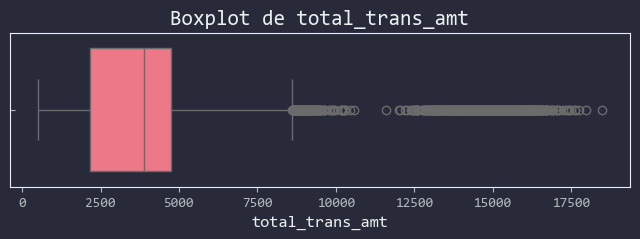

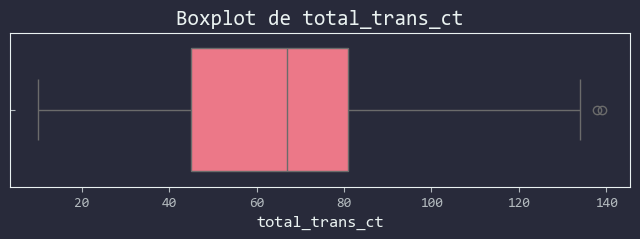

In [56]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.figure(figsize=(8, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.xlabel(f'{col}')
        plt.show()
    else:
        continue


### 1. Análisis descriptivo
- Observar la distribución de cada una de las variables, con la variable de respuesta.
	- `groupby(client_stayed)` y luego las distribuciones.
- Ver la granularidad de cada variable.

- Matriz de correlación de los variables, para revisar qué tanto están relacionadas

In [57]:
print(df['client_stayed'].value_counts())
print(df['client_stayed'].value_counts(normalize=True) * 100)

client_stayed
1    8500
0    1627
Name: count, dtype: int64
client_stayed
1    83.934038
0    16.065962
Name: proportion, dtype: float64


In [58]:
resultado = df.drop(columns=['clientnum','dependent_count']).groupby('client_stayed').sum(numeric_only=True)
resultado

,customer_age,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
client_stayed,,,,,,,,,
0,75915,58862,5336,4382,4836,13237336.2,1094683,5035607,73107
1,393228,304985,33274,19327,20029,74178458.9,10681135,39564575,583717


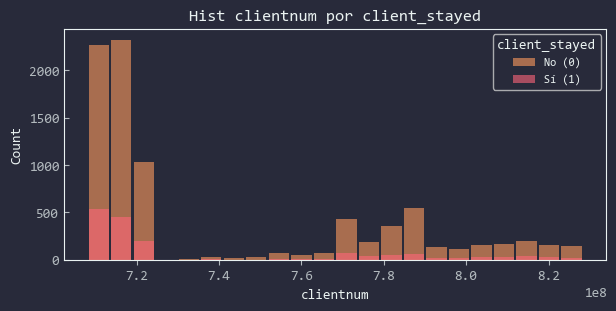

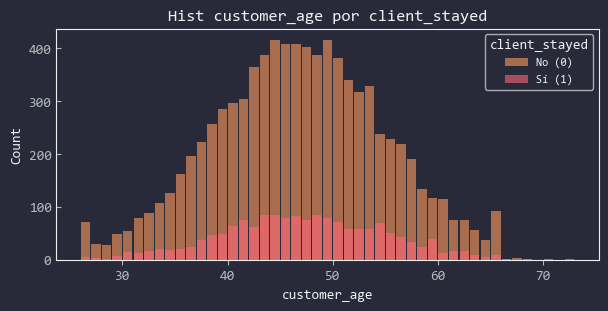

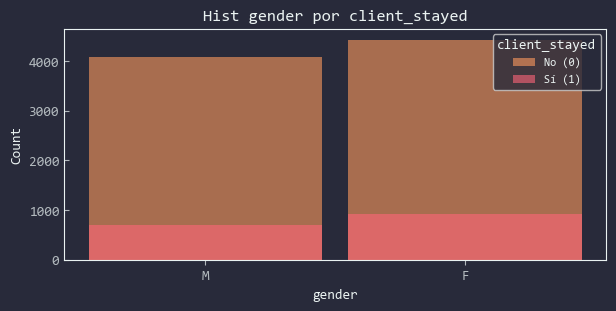

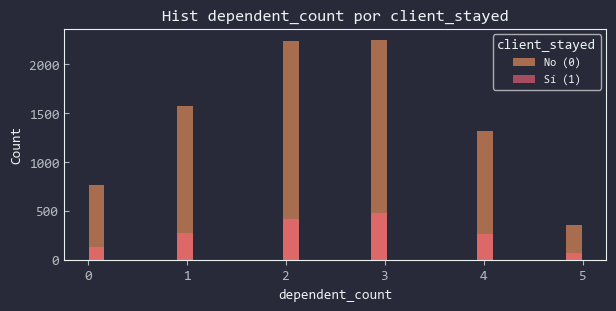

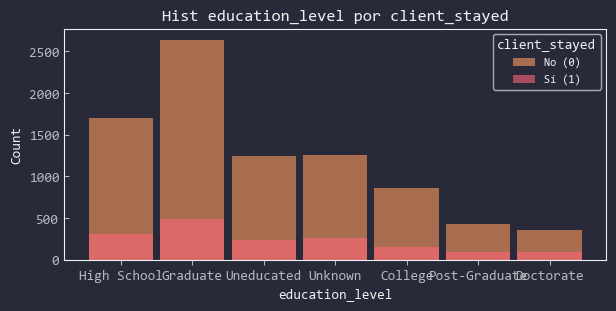

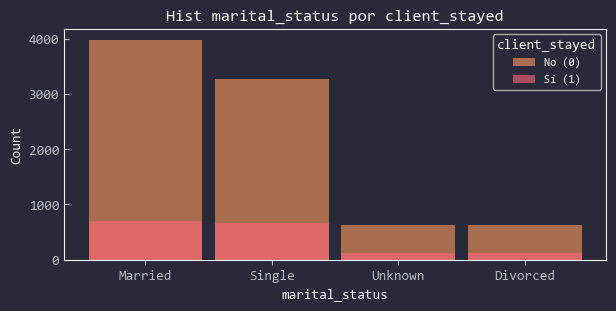

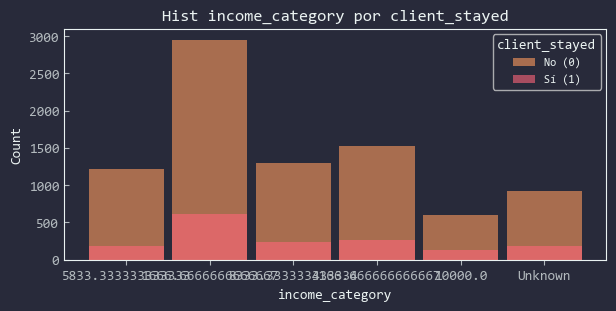

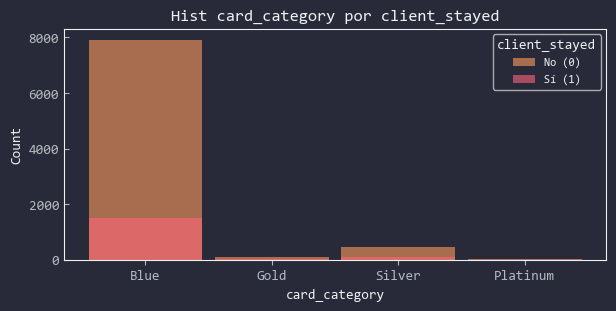

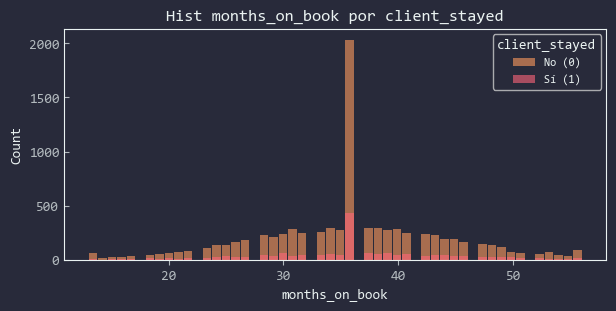

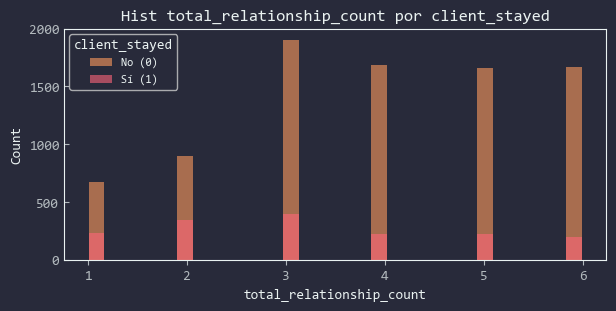

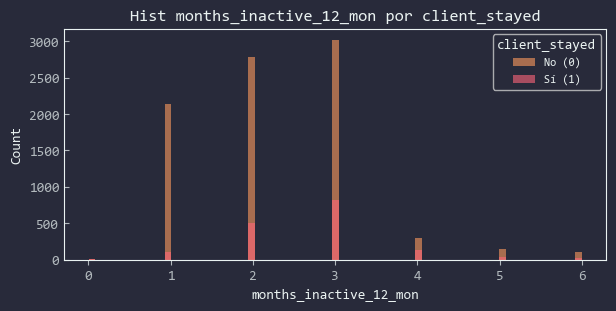

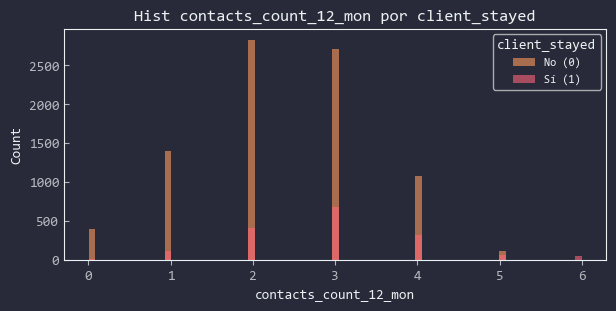

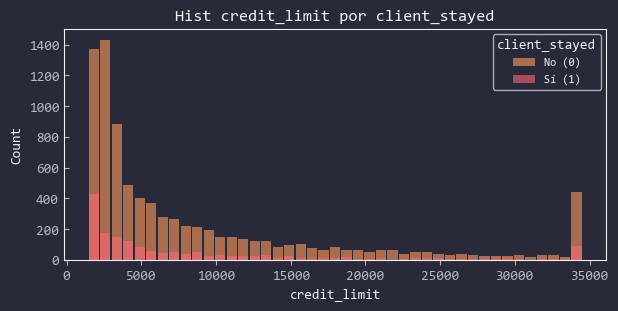

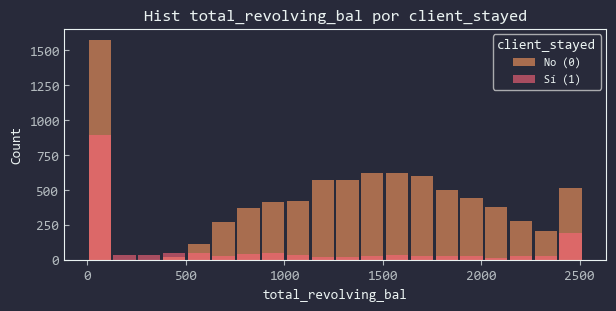

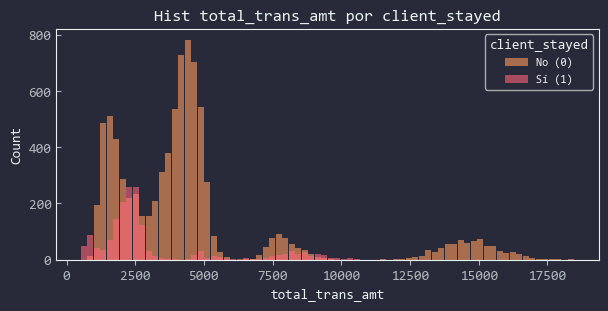

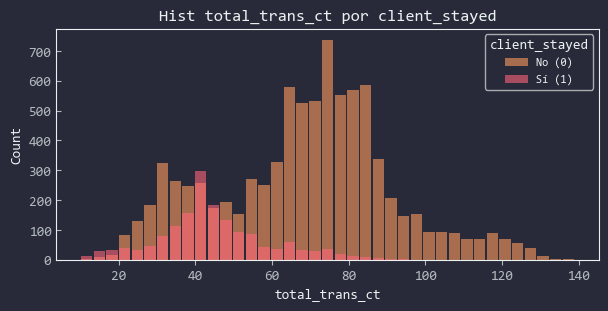

In [59]:

for column in df.columns:
    if column != 'client_stayed': 
        plt.figure(figsize=(7, 3))
        sns.histplot(
            data=df,
            x=column,
            hue='client_stayed',
            multiple='layer',  
            # kde=True,         
            alpha=0.6,        
            shrink=0.9,
            edgecolor='none',
        )
        plt.title(f'Hist {column} por client_stayed', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.legend(title='client_stayed', labels=['No (0)', 'Sí (1)'], fontsize=8)
        plt.show()

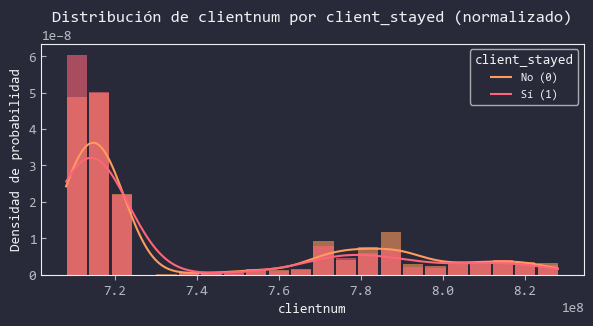

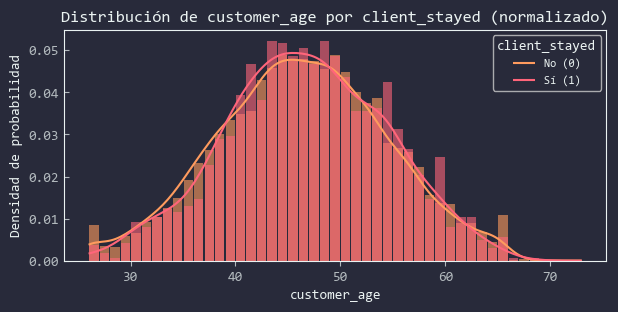

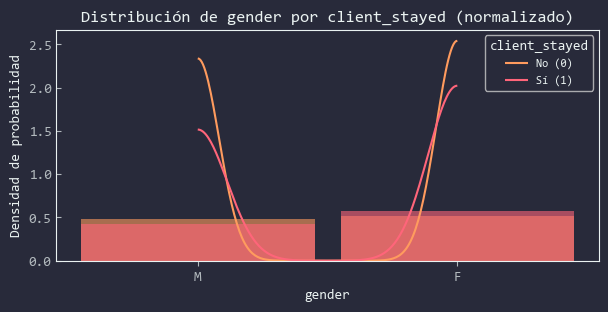

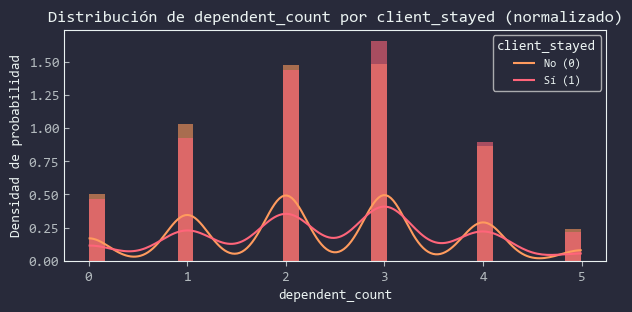

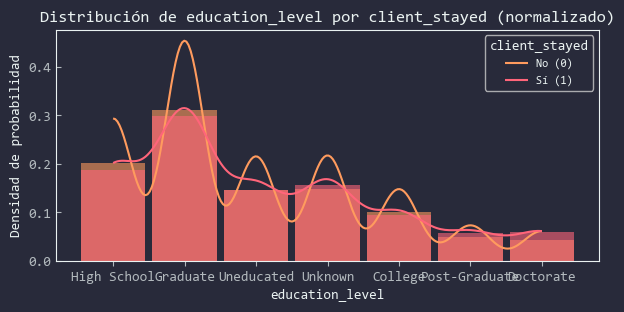

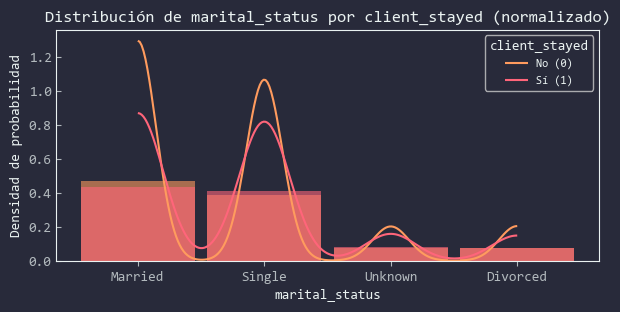

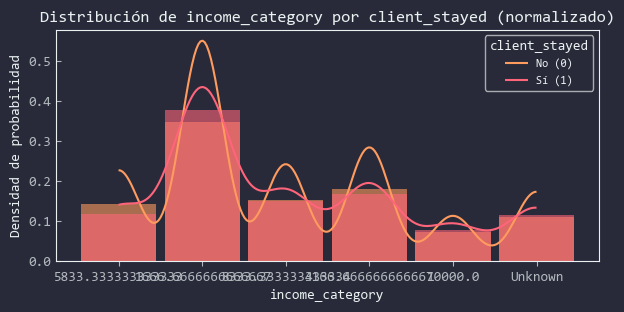

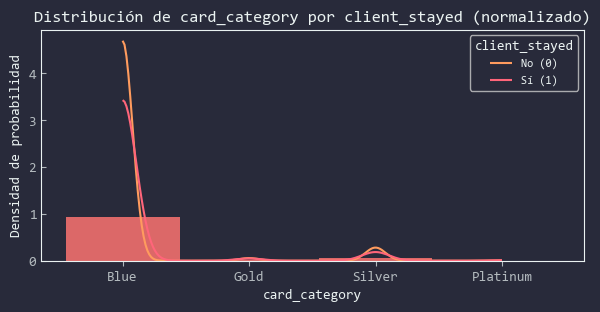

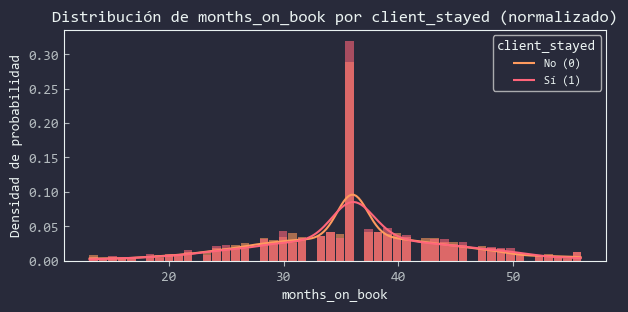

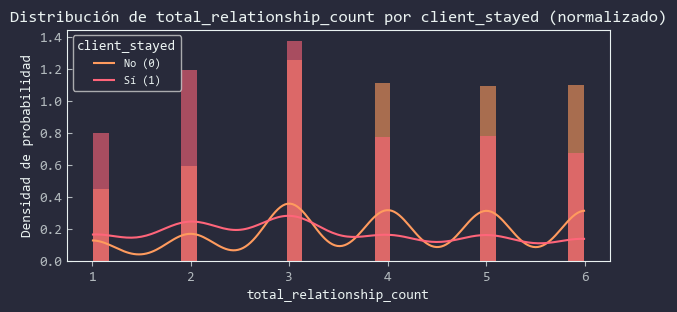

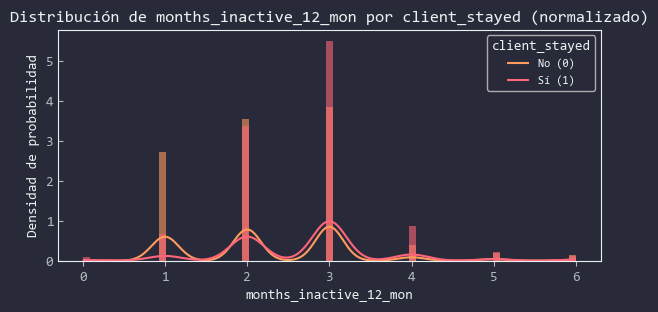

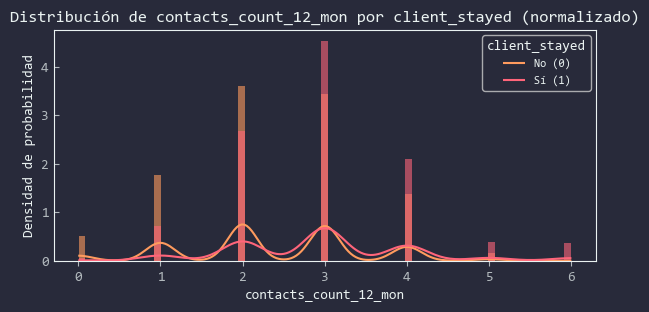

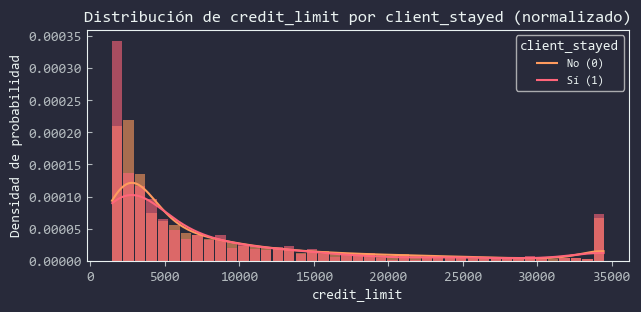

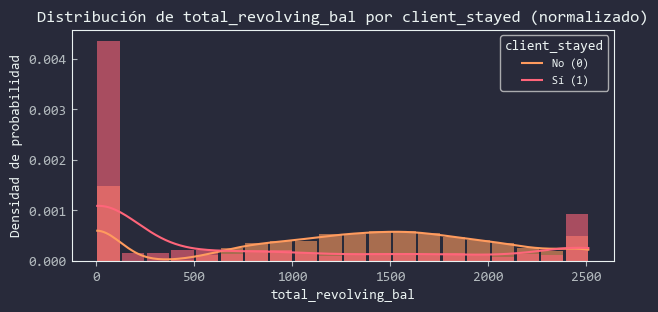

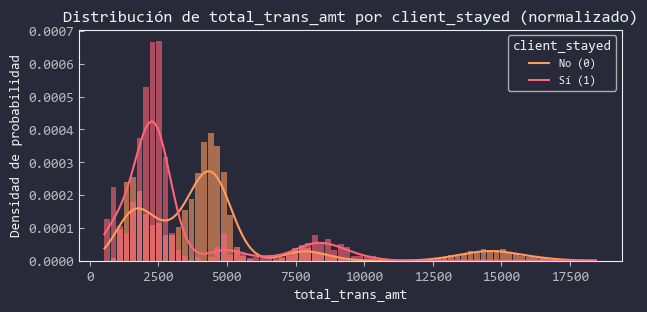

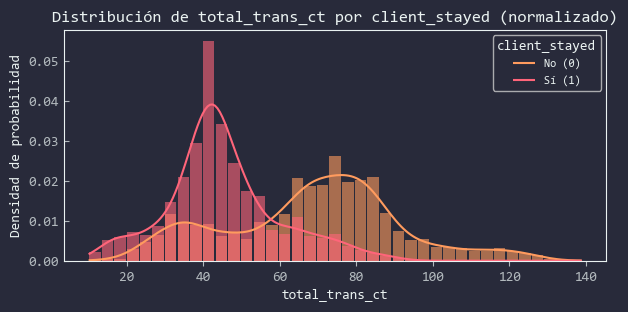

In [60]:
for column in df.columns:
    if column != 'client_stayed':
        plt.figure(figsize=(7, 3))
        sns.histplot(
            data=df,
            x=column,
            hue='client_stayed',
            multiple='layer',  
            kde=True,
            alpha=0.6, 
            shrink=0.9,
            edgecolor='none',
            stat='density',
            common_norm=False, 
        )
        plt.title(f'Distribución de {column} por client_stayed (normalizado)', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Densidad de probabilidad', fontsize=10)
        plt.legend(title='client_stayed', labels=['No (0)', 'Sí (1)'], fontsize=8)
        plt.show()

In [61]:
frecuencia_valores = df['dependent_count'].value_counts().sort_index()
print("Frecuencia de cada valor:")
print(frecuencia_valores)

Frecuencia de cada valor:
dependent_count
0     904
1    1838
2    2655
3    2732
4    1574
5     424
Name: count, dtype: int64


In [62]:
granularidad_por_grupo = df.groupby('client_stayed').nunique().transpose()
granularidad_por_grupo


client_stayed,0,1
clientnum,1627,8500
customer_age,42,45
gender,2,2
dependent_count,6,6
education_level,7,7
marital_status,4,4
income_category,6,6
card_category,4,4
months_on_book,44,44
total_relationship_count,6,6


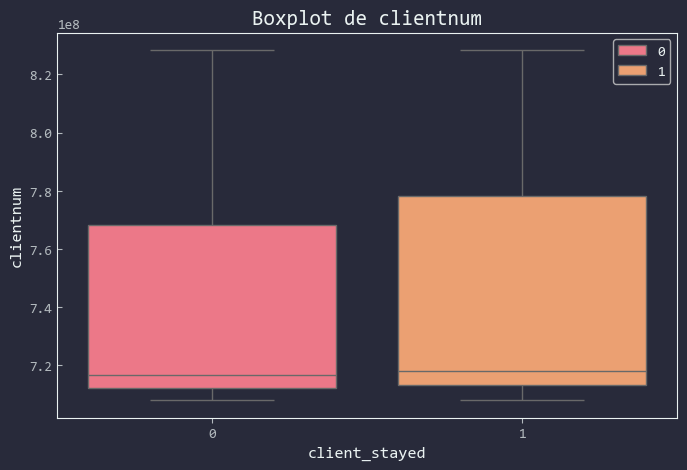

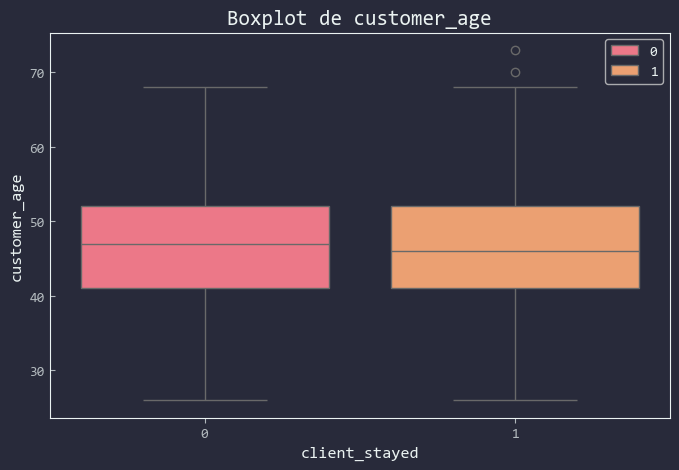

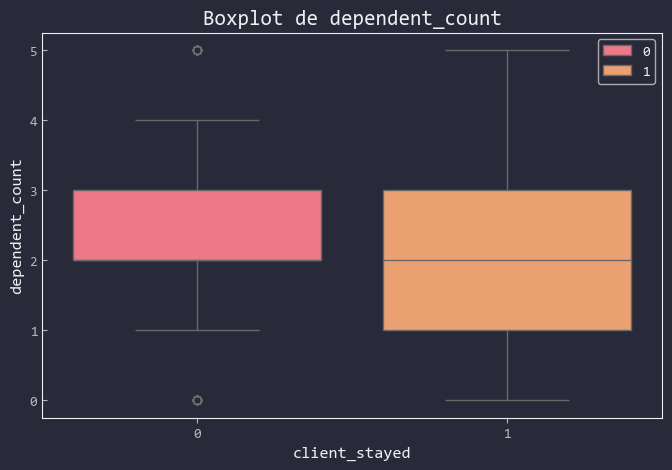

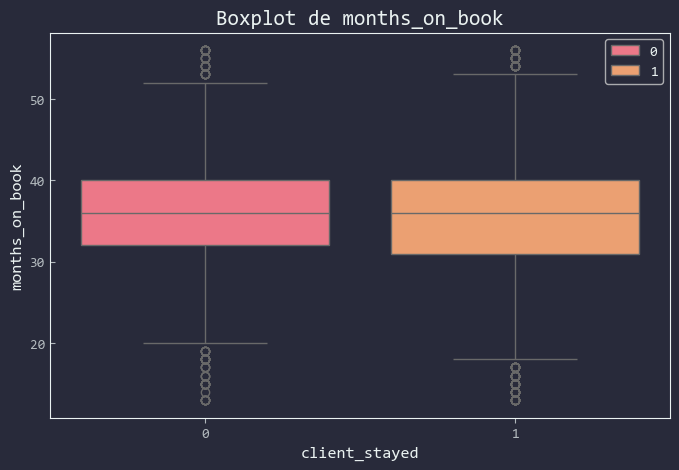

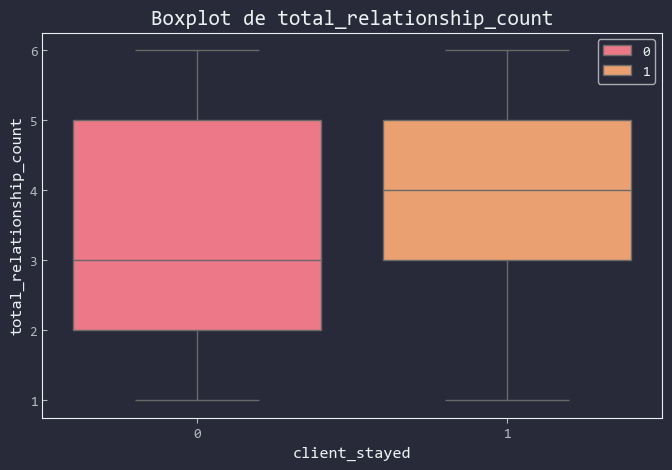

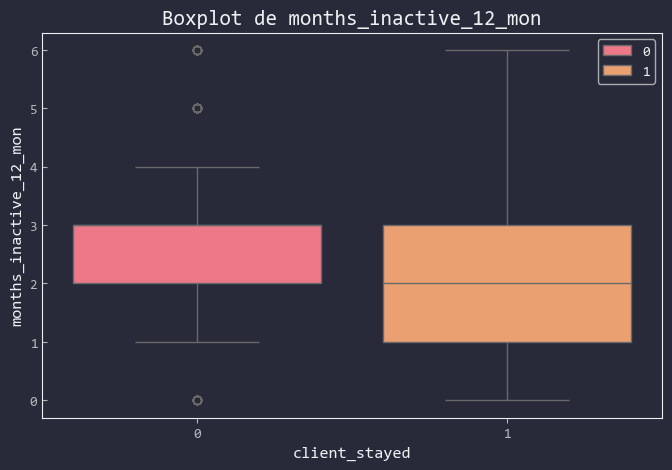

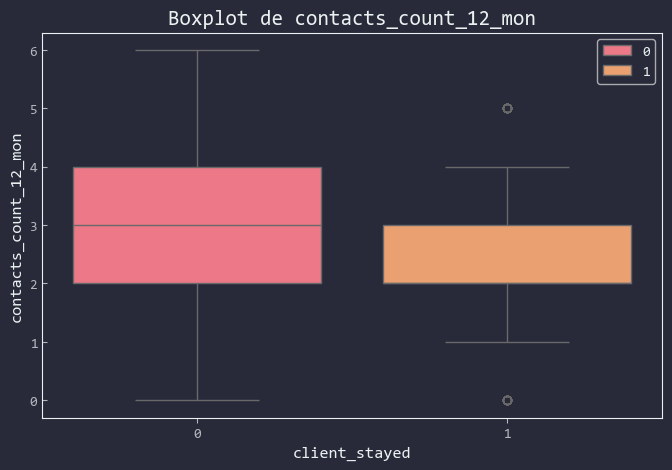

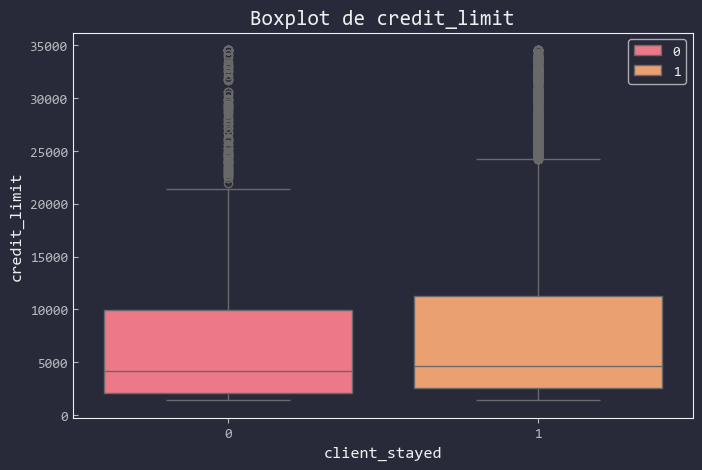

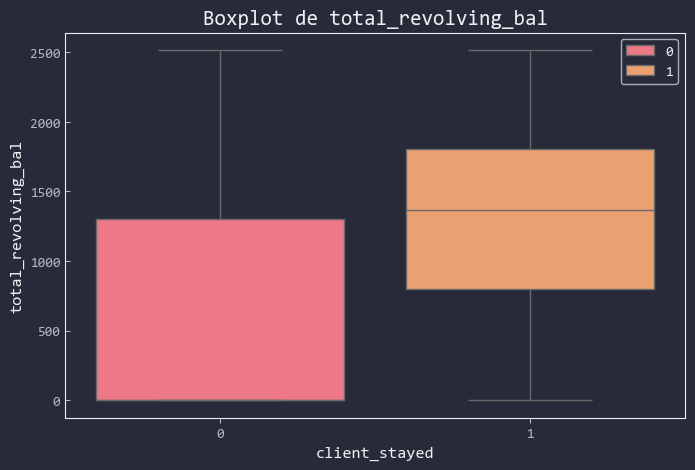

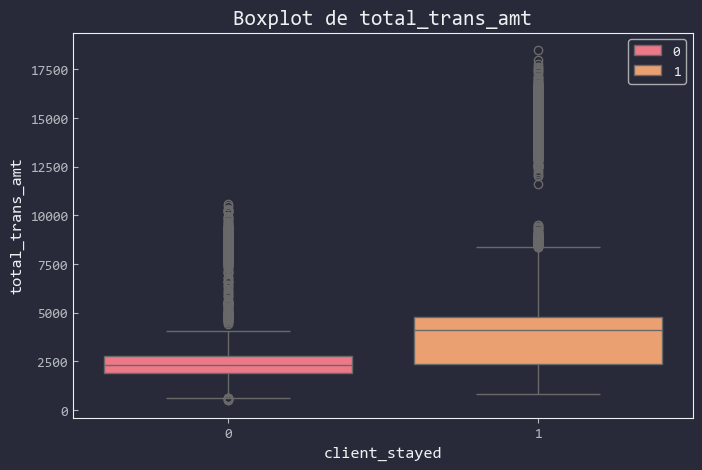

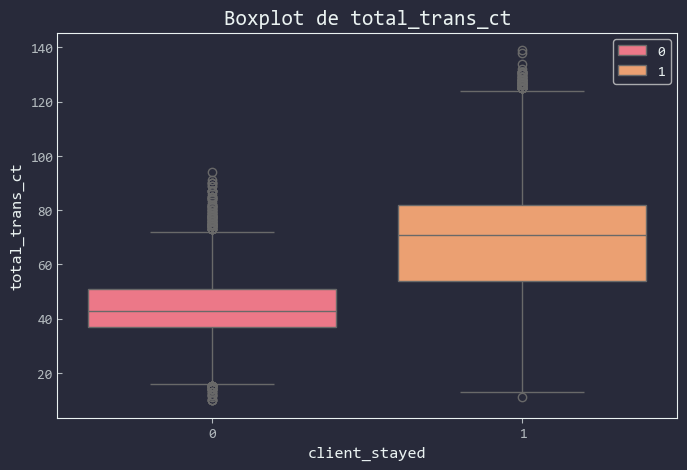

In [63]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('client_stayed')

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=df,
        x='client_stayed',  
        y=col,              
        hue='client_stayed',  
        dodge=False,        
    )
    plt.title(f'Boxplot de {col}')
    plt.xlabel('client_stayed')
    plt.ylabel(col)
    plt.legend()
    plt.show()

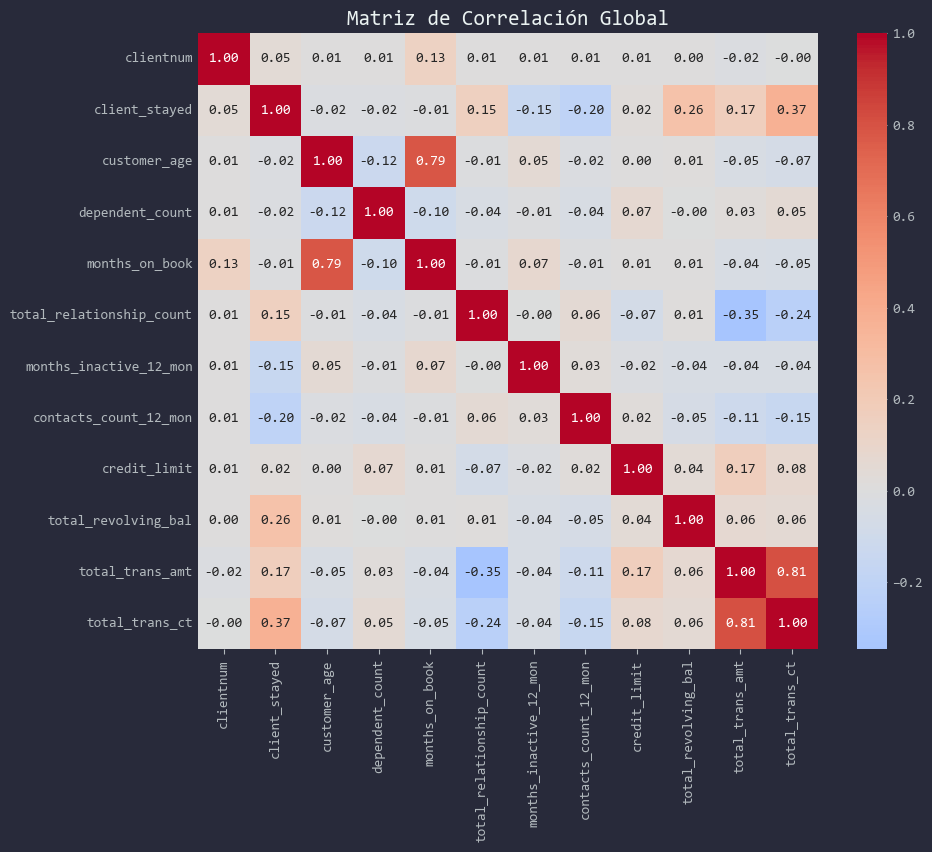

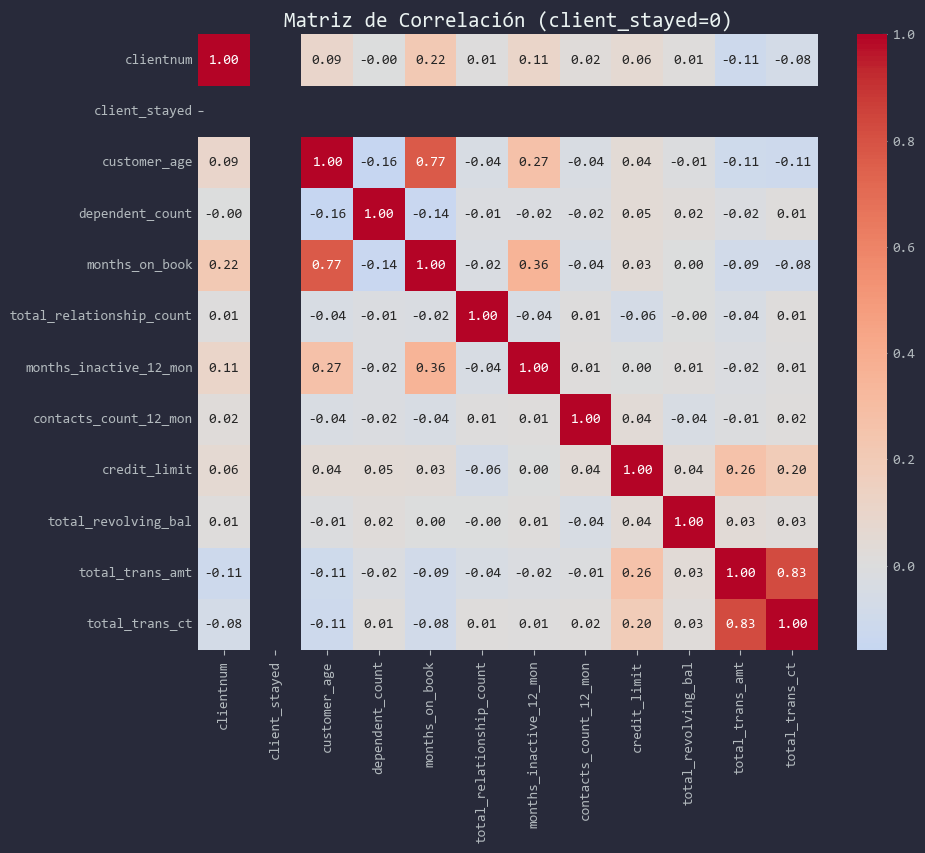

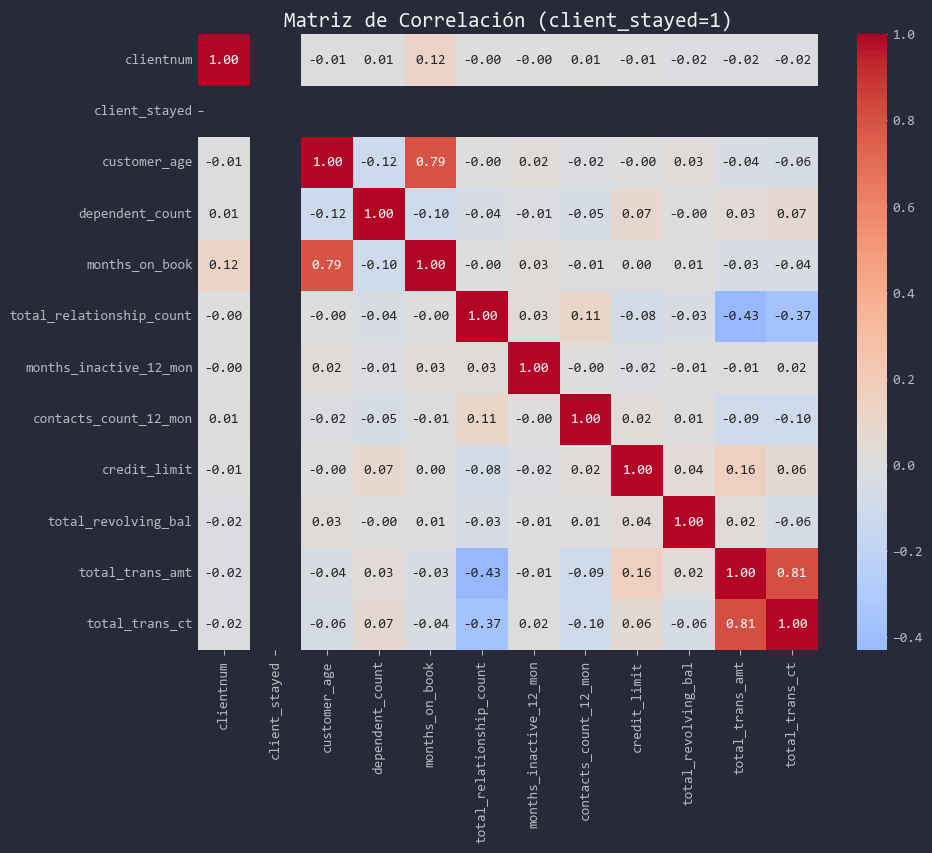

In [64]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

group_0 = df[df['client_stayed'] == 0][numeric_cols]
group_1 = df[df['client_stayed'] == 1][numeric_cols]
                                       
corr_global = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_global, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Matriz de Correlación Global")
plt.show()

corr_group0 = group_0.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_group0, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Matriz de Correlación (client_stayed=0)")
plt.show()

corr_group1 = group_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_group1, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Matriz de Correlación (client_stayed=1)")
plt.show()

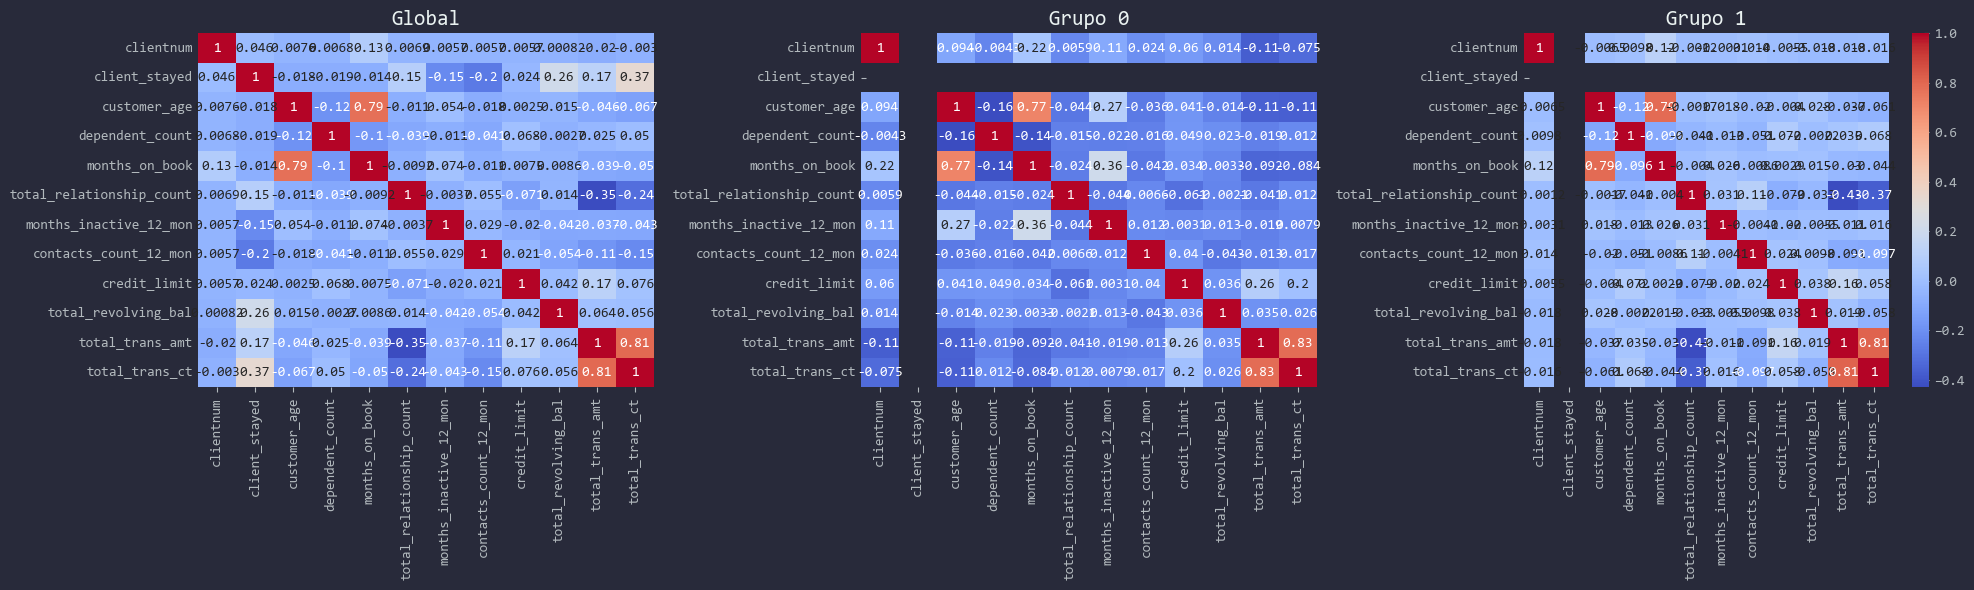

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(corr_global, annot=True, cmap='coolwarm', ax=axes[0], cbar=False)
axes[0].set_title("Global")

sns.heatmap(corr_group0, annot=True, cmap='coolwarm', ax=axes[1], cbar=False)
axes[1].set_title("Grupo 0")

sns.heatmap(corr_group1, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title("Grupo 1")

plt.tight_layout()
plt.show()

In [70]:
tasa_target = df.groupby('education_level')['client_stayed'].mean().sort_values(ascending=False)
print("Tasa de target=1 por categoría:\n", tasa_target)

Tasa de target=1 por categoría:
 education_level
High School      0.847988
College          0.847976
Graduate         0.844309
Uneducated       0.840619
Unknown          0.831468
Post-Graduate    0.821705
Doctorate        0.789357
Name: client_stayed, dtype: float64


In [72]:
from scipy.stats import chi2_contingency

# Tabla de contingencia: "nivel_estudio" vs "target"
contingency_table = pd.crosstab(df['education_level'], df['client_stayed'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"p-value: {p_value:.4f}")

p-value: 0.0515


In [76]:
# 1. Calcular la media global de client_stayed
global_mean = df['client_stayed'].mean()

# 2. Calcular la media por categoría (education_level) y aplicar suavizado
alpha = 5  # Factor de suavizado (ajústalo según tus datos)
df['nivel_encoded'] = df.groupby('education_level')['client_stayed'].transform(
    lambda x: (x.mean() * len(x) + global_mean * alpha) / (len(x) + alpha)
)

print(df[['education_level', 'client_stayed', 'nivel_encoded']])

      education_level  client_stayed  nivel_encoded
0         High School              1       0.847967
1            Graduate              1       0.844302
2            Graduate              1       0.844302
3         High School              1       0.847967
4          Uneducated              1       0.840614
...               ...            ...            ...
10122        Graduate              1       0.844302
10123         Unknown              0       0.831494
10124     High School              0       0.847967
10125        Graduate              0       0.844302
10126        Graduate              0       0.844302

[10127 rows x 3 columns]


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Opción 1: Incluir "Unknown" (usando 'nivel_encoded' ya calculado)
X = df[['nivel_encoded']]
y = df['client_stayed']
model = LogisticRegression().fit(X, y)
y_pred = model.predict_proba(X)[:, 1]
print(f"AUC con 'Unknown': {roc_auc_score(y, y_pred):.2f}")

# Opción 2: Eliminar "Unknown" (CORRECCIÓN: sin comilla extra en 'client_stayed')
df_clean = df[df['education_level'] != 'Unknown']  # Asegúrate que el nombre de la columna coincide
X_clean = df_clean[['nivel_encoded']]
y_clean = df_clean['client_stayed']  # <- Corrección aquí (sin comillas adicionales)
model_clean = LogisticRegression().fit(X_clean, y_clean)
y_pred_clean = model_clean.predict_proba(X_clean)[:, 1]
print(f"AUC sin 'Unknown': {roc_auc_score(y_clean, y_pred_clean):.2f}")

AUC con 'Unknown': 0.52
AUC sin 'Unknown': 0.52
